In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\HP\Downloads\Dataset .csv")


In [9]:
print(df['Rating text'])



0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object


Task 1-Restaurant Reviews

Analyze the text reviews to identify the most common positive and negative keywords.

In [10]:
positive_data=df.loc[df['Aggregate rating']>=2.5]
print(positive_data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [11]:
positive_keywords=positive_data['Rating text'].unique()
print(positive_keywords)

['Excellent' 'Very Good' 'Good' 'Average']


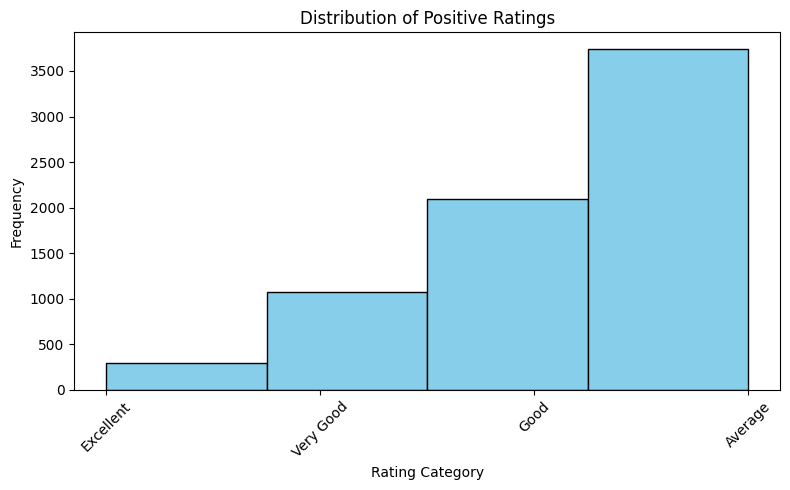

In [12]:

import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\HP\Downloads\Dataset .csv")
filtered_reviews = data[data['Aggregate rating'] >= 2.5]
rating_labels = filtered_reviews['Rating text'].unique()

plt.figure(figsize=(8, 5))
plt.hist(filtered_reviews['Rating text'], bins=len(rating_labels), edgecolor='black', color='skyblue')
plt.title("Distribution of Positive Ratings")
plt.xlabel("Rating Category")
plt.ylabel("Frequency")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
negative_data=df.loc[(df['Aggregate rating'] <2.5) & (df['Aggregate rating']>0)]
negative_keywords=negative_data['Rating text'].unique()
print(negative_keywords)

['Poor']


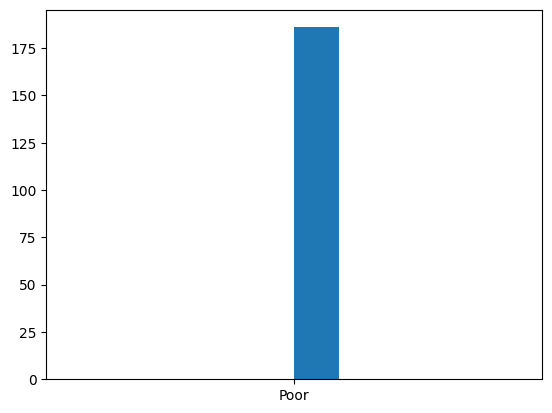

In [8]:
plt.hist(negative_data['Rating text'],label=negative_keywords)
plt.show()

Task 2-Votes Analysis

Identify the restaurants with the highest and lowest number of votes.

In [10]:
Highest_voted_restaurant=df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=False)
Highest_voted_restautrant=Highest_voted_restaurant.idxmax()
print("The Highest Voted Restraunt is :",Highest_voted_restaurant)


The Highest Voted Restraunt is : Restaurant Name
Barbeque Nation               28142
AB's - Absolute Barbecues     13400
Toit                          10934
Big Chill                     10853
Farzi Cafe                    10098
                              ...  
Frugurpop-  ibis New Delhi        0
Frozen Grillz                     0
Break Fast Junction               0
Pizza Hot                         0
Piyu Fast Food                    0
Name: Votes, Length: 7446, dtype: int64


In [4]:
Lowest_voted_restaurant=df.groupby('Restaurant Name')['Votes'].sum().sort_values()
Lowest_voted_restautrant=Lowest_voted_restaurant.idxmax()
print("The Lowest Voted Restraunt is :",Lowest_voted_restaurant)


The Lowest Voted Restraunt is : Restaurant Name
Breaky2Dinner                    0
Brown House Cafe                 0
Buddy 's. Pizza                  0
Buzybee                          0
Burj Al Arab                     0
                             ...  
Farzi Cafe                   10098
Big Chill                    10853
Toit                         10934
AB's - Absolute Barbecues    13400
Barbeque Nation              28142
Name: Votes, Length: 7446, dtype: int64


Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [ ]:
# Compute correlation matrix between 'Votes' and 'Aggregate rating'
vote_rating_corr = np.corrcoef(df['Votes'], df['Aggregate rating'])
vote_rating_corr = np.round(vote_rating_corr, 2)

print("Correlation Matrix:\n", vote_rating_corr)

Correlation Matrix:
 [[1.   0.31]
 [0.31 1.  ]]


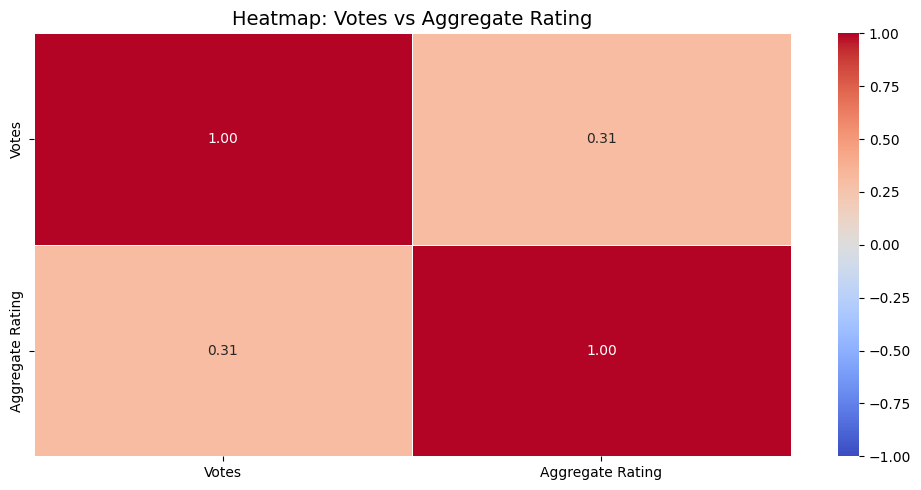

In [19]:
import seaborn as sns
axis_labels = ['Votes', 'Aggregate Rating']

# Create heatmap visualization
plt.figure(figsize=(10, 5), dpi=100)
sns.heatmap(vote_rating_corr, 
            annot=True, 
            fmt=".2f", 
            linewidths=0.4, 
            xticklabels=axis_labels, 
            yticklabels=axis_labels, 
            cmap='coolwarm', 
            vmin=-1, vmax=1)

plt.title("Heatmap: Votes vs Aggregate Rating", fontsize=14)
plt.tight_layout()
plt.show()

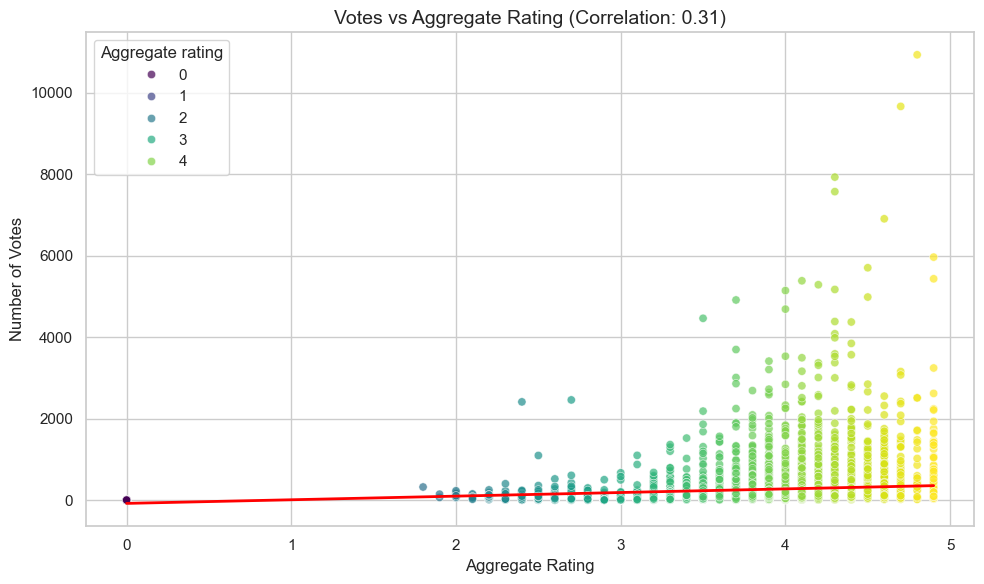

The computed correlation coefficient is approximately 0.31, suggesting a moderate positive relationship between restaurant ratings and the number of votes received.


In [25]:


# Set visual style
sns.set(style="whitegrid")

# Create scatter plot with color gradient based on rating
plt.figure(figsize=(10, 6), dpi=100)
sns.scatterplot(data=df, x='Aggregate rating', y='Votes', hue='Aggregate rating', palette='viridis', alpha=0.7)

sns.regplot(data=df, x='Aggregate rating', y='Votes', scatter=False, color='red', line_kws={'linewidth': 2})

# Add title and layout adjustments
plt.title("Votes vs Aggregate Rating (Correlation: 0.31)", fontsize=14)
plt.xlabel("Aggregate Rating", fontsize=12)
plt.ylabel("Number of Votes", fontsize=12)
plt.tight_layout()
plt.show()

print("The computed correlation coefficient is approximately 0.31, suggesting a moderate positive relationship between restaurant ratings and the number of votes received.")

Task 3-Price Range vs. Online Delivery and Table Booking

Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

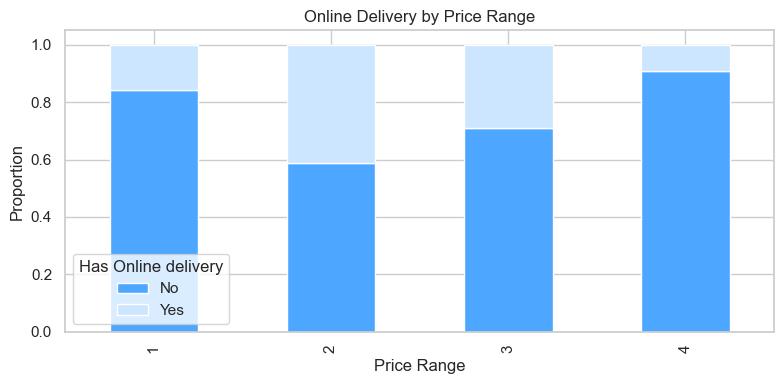

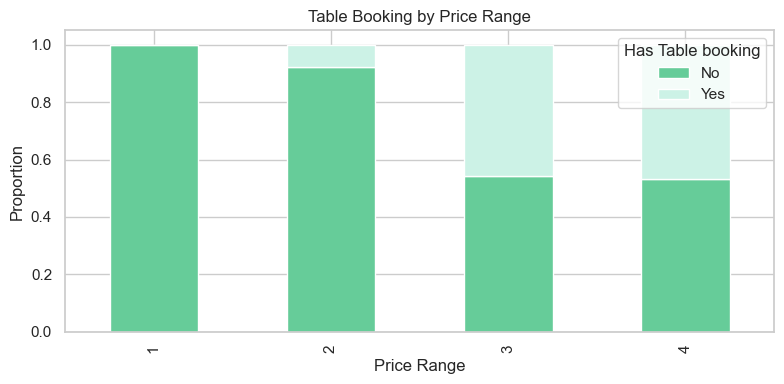

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a plotting function
def plot_service_availability(df, service_col, title, color):
    data = df.groupby('Price range')[service_col].value_counts(normalize=True).unstack()
    data.plot(kind='bar', stacked=True, color=color, figsize=(8, 4))
    plt.title(title)
    plt.xlabel('Price Range')
    plt.ylabel('Proportion')
    plt.legend(title=service_col.replace('_', ' '))
    plt.tight_layout()
    plt.show()

# Plot for online delivery and table booking
plot_service_availability(df, 'Has Online delivery', 'Online Delivery by Price Range', ['#4da6ff', '#cce6ff'])
plot_service_availability(df, 'Has Table booking', 'Table Booking by Price Range', ['#66cc99', '#ccf2e6'])

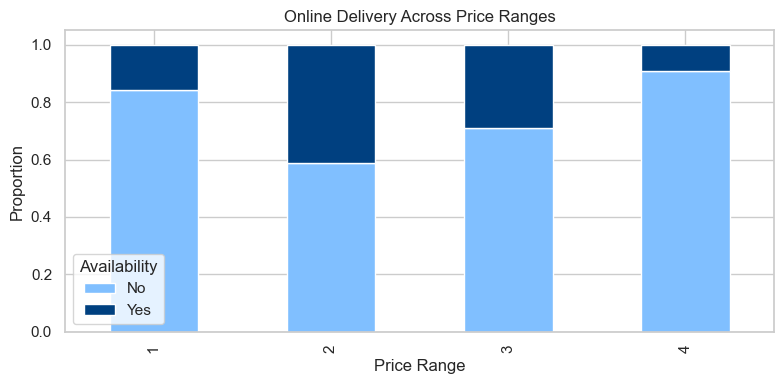

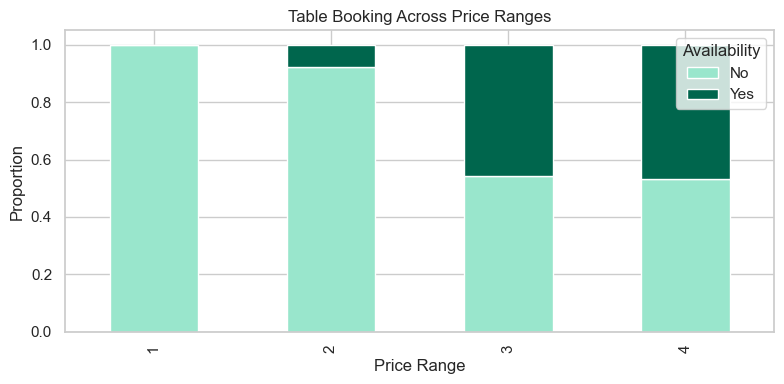

In [30]:
import matplotlib.pyplot as plt

# Custom plotting function
def draw_service_chart(data, title, shades):
    fig, ax = plt.subplots(figsize=(8, 4))
    data.plot(kind='bar', stacked=True, color=shades, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Price Range')
    ax.set_ylabel('Proportion')
    ax.legend(title='Availability')
    plt.tight_layout()
    plt.show()

# Visualize online delivery and table booking
draw_service_chart(delivery_ratio, 'Online Delivery Across Price Ranges', ['#80bfff', '#004080'])
draw_service_chart(booking_ratio, 'Table Booking Across Price Ranges', ['#99e6cc', '#00664d'])